# Average Climate Model RCP 8.5 training and prediction

In [ ]:
from droughtpredictor import DroughtPredictor


========================== LOADING AND PREPARING DATA ==========================
Historical data: 768 rows from 1950-01-01 00:00:00 to 2013-12-01 00:00:00
Future data: 900 rows from 2025-01-01 00:00:00 to 2099-12-01 00:00:00

========================= ENHANCED FEATURE ENGINEERING =========================

Target variable statistics:
D0: min=0.00, max=100.10, mean=42.54, median=31.20
D1: min=0.00, max=100.00, mean=30.76, median=9.30
D2: min=0.00, max=100.00, mean=15.37, median=0.00
D3: min=0.00, max=95.09, mean=6.97, median=0.00
D4: min=0.00, max=71.80, mean=1.85, median=0.00

D4 binary class distribution: D4_binary
0    653
1    115
Name: count, dtype: int64
No NaN values in the feature-engineered historical data
Total number of features: 79
Base features: 8
Seasonal features: 6
Rolling features: 9
Interaction features: 6
Derived features: 50

========================= FEATURE IMPORTANCE ANALYSIS ==========================

Feature importance for D0:

Top important features:
  D0_lag

KeyError: "['airtemp_roll_3', 'airtemp_roll_6', 'rainfall_roll_3', 'rainfall_roll_6', 'rainfall_roll_12', 'sm_roll_6', 'airtemp_ev_interaction', 'airtemp_runoff_interaction', 'rainfall_runoff_interaction', 'D0_lag_1', 'D1_lag_1'] not in index"

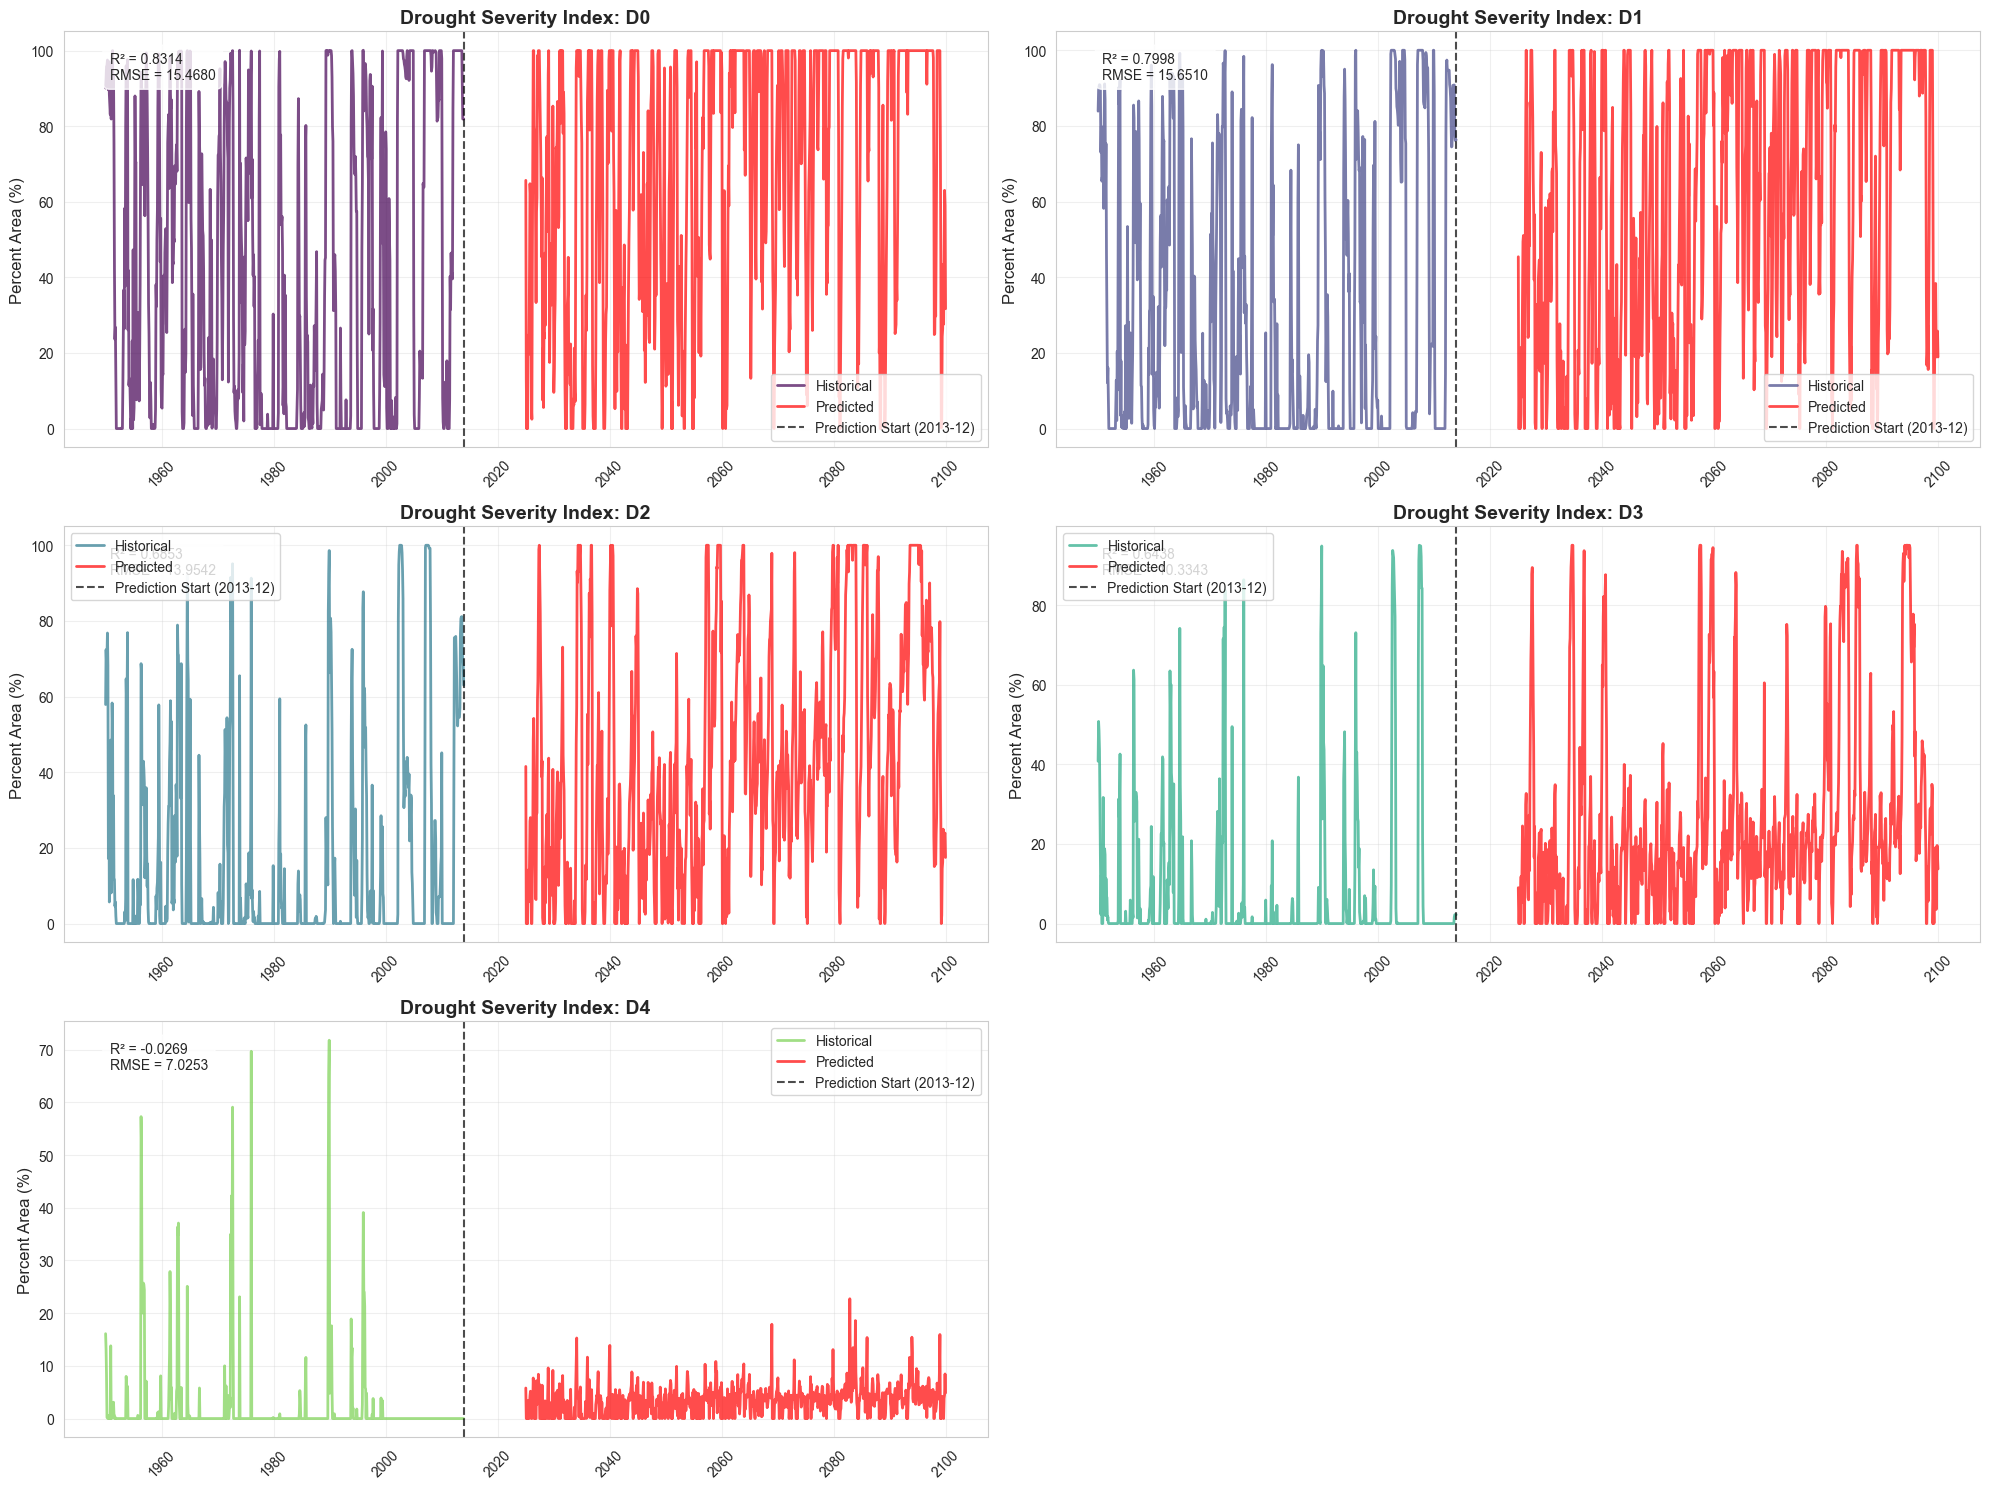

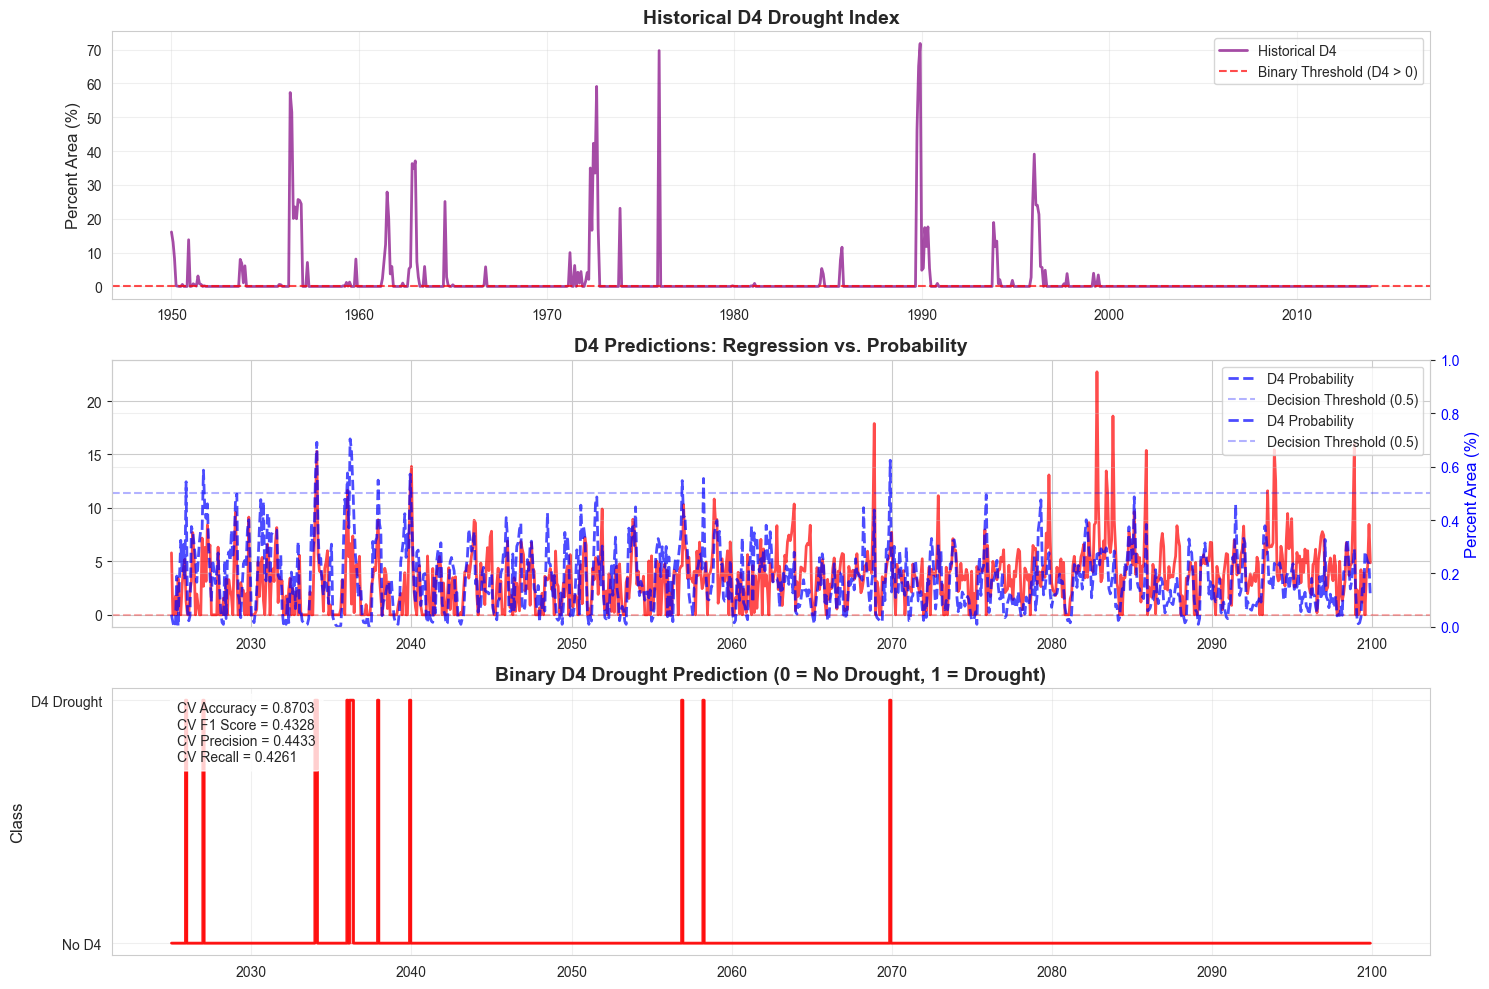

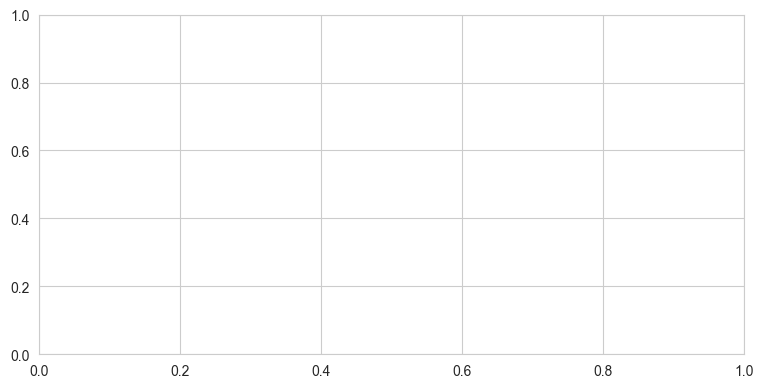

In [ ]:
# Initialize the predictor
predictor = DroughtPredictor(
    min_year=1950,
    max_year=2013,
    result_dir='results',
    data_simul = 'avg85'
)

# # Option 1: Run the complete pipeline
# predictor.run_complete_pipeline(
#     historical_file='final_historical.csv',
#     future_file='future_all_df_wd_85.csv'
# )

# Option 2: Run individual steps for more control
predictor.load_data('final_historical.csv', 'future_all_df_avg_85.csv')
predictor.prepare_features()
predictor.select_features()
predictor.cross_validate(n_splits=5)
predictor.train_final_models()
predictor.make_predictions()
predictor.create_visualizations()
predictor.create_uncertainty_visualization()
predictor.generate_report()

print("Drought prediction completed successfully!")